In [12]:
import numpy as np
import pandas as pd
from GROFRAME import GROFRAME as gf
import plotly.graph_objects as go
import MDAnalysis as mda
from rdkit import Chem

In [193]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

In [5]:
u = mda.Universe("../without_heparin/nvt1.gro")

In [145]:
rids  = u.select_atoms("resname LIG").resids
rids 

array([30045, 30045, 30045, ..., 30144, 30144, 30144])

In [146]:
def PlotPC(at , opacity = 0.5):
    data = at.positions
    x, y, z = data[:,0], data[:,1], data[:,2]
    types = at.types
    color_dict = {"C":"green", "N":"blue", "O":"red", "H":"yellow"}
    color = list(map(elem2col, types))
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                       mode='markers',marker=dict(
                color =  color,
                size=5,
                opacity=opacity ))])
    fig.layout.scene.camera.projection.type = 'orthographic'
    #for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    name = at.resnames[0]
    resid = at.resids[0]
    title = name + " " + str(resid)
    fig.update_layout(template="simple_white", title = title)
    fig.update_layout(
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=0,
            r=0,
            b=10,
            t=40,
            pad=10
        ),
        paper_bgcolor="LightSteelBlue",
    )
    #legend
    fig.update_layout(showlegend=False)

    #x axis
    #fig.update_xaxes(visible=False, showline = False, zeroline = False, showticklabels=False)
    fig.update_layout(
        scene=dict(
            xaxis=dict(showticklabels=False,ticks="",title = ""),
            yaxis=dict(showticklabels=False,ticks="", title = ""),
            zaxis=dict(showticklabels=False,ticks="", title = ""),
        )
    )
    #y axis    
    #fig.update_yaxes(visible=False,  showline = False, zeroline = False, showticklabels=False)
    fig.show()

In [382]:
at = u.select_atoms("resid 30144 and not name H*")

In [383]:
PlotPC(at)

In [384]:
def elem2col(elem):
    col = color_dict[elem]
    return col
color = list(map(elem2col, types))

In [385]:
types = at.types

In [386]:
at.write("current.pdb")

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'altLocs' Using default value of ' '

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'icodes' Using default value of ' '

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'chainIDs' Using default value of ''

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'occupancies' Using default value of '1.0'

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1080: UserWarning:

Found no information for attr: 'tempfactors' Using default value of '0.0'

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-package

In [387]:
mol = Chem.MolFromPDBFile("current.pdb")

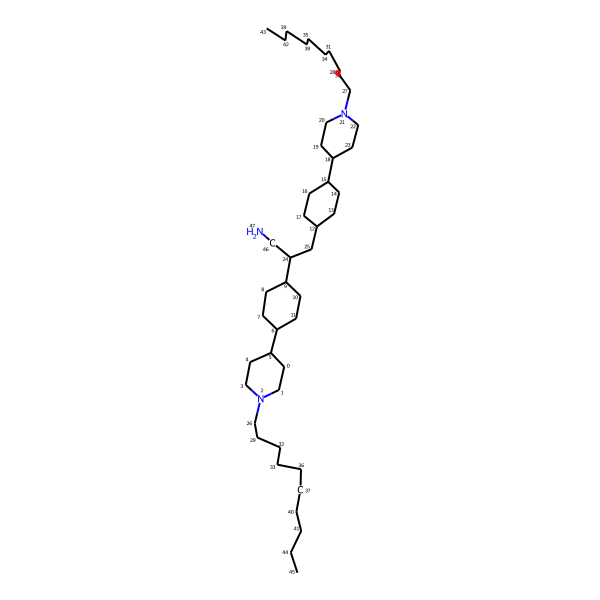

In [388]:
mol

In [389]:
sssr = Chem.GetSymmSSSR(mol)

In [390]:
trial = mda.Universe("current.pdb")

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning:

Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.



In [178]:
get_ring_names(0)

['C', 'C4', 'C3', 'C2', 'N', 'C1']

In [201]:
ring_center(3)

array([19.17    , 59.045002, 23.231665], dtype=float32)

In [391]:
a = GRO("../without_heparin/nvt1.gro")

In [392]:
df = a.makeDataFrame()

In [393]:
ndf = df[(df.rid == 30045)]
fdf = ndf[hfilter]

In [370]:
fdf

,rid,resname,name,id,x,y,z
89732,30045,LIG,C,89733,2.588,4.608,2.508
89733,30045,LIG,C1,89734,2.628,4.491,2.565
89734,30045,LIG,N,89735,2.678,4.484,2.690
89735,30045,LIG,C2,89736,2.688,4.598,2.763
89736,30045,LIG,C3,89737,2.649,4.719,2.712
89737,30045,LIG,C4,89738,2.598,4.737,2.578
89738,30045,LIG,C5,89739,2.545,4.858,2.536
89739,30045,LIG,C6,89740,2.554,4.973,2.610
89740,30045,LIG,C7,89741,2.509,5.092,2.555
89741,30045,LIG,C8,89742,2.440,5.101,2.434


In [232]:
hfilter = np.array(["H" not in np.array(ndf.name)[i] for i in range(len(ndf))])

In [236]:
at

<AtomGroup with 48 atoms>

In [365]:
import numpy as np
import pandas as pd

class GRO:
    import numpy as np
    import pandas as pd
    def __init__(self, fname):
        self.fname = fname
        self.all_lines = open(self.fname, encoding = "utf-8").readlines()
        length = len(self.all_lines)
        if int(self.all_lines[1]) != (length - 3):
            print("Number of atoms mismatch!!")
        self.dimension = np.array(self.all_lines[-1].split(), dtype = float)
    def make_line(self,i):
        Line = self.all_lines[i]
        mLine = self.getLine(Line)
        mDict = {"rid" : mLine[0], "resname" : mLine[1], "name" : mLine[2],
                 "id" : mLine[3], "x" : mLine[4], "y" : mLine[5], "z" : mLine[6]}
        return mDict
    def getLine(self,Line):
        rid = Line[:5].strip()
        resname = Line[5:10].strip()
        nname = Line[10:15].strip()
        nid = Line[15:20].strip()
        x = Line[20:28].strip()
        y = Line[28:36].strip()
        z = Line[36:44].strip()
        return rid, resname, nname, nid, x, y, z
    def makeDataFrame(self):
        totalAtomNumber = int(self.all_lines[1])
        #print(totalAtomNumber)
        #df = pd.DataFrame({"rid" : 0, "resname" : 1, "name" : 2,
        #         "id" : 3, "x" : 4, "y" : 5, "z" : 6}, index = [0])
        Lines = self.all_lines[2:-1]
        rid = np.array([self.getLine(Lines[i])[0] for i in range(totalAtomNumber)], dtype = int)
        resname = np.array([self.getLine(Lines[i])[1] for i in range(totalAtomNumber)], dtype = str)
        name = np.array([self.getLine(Lines[i])[2] for i in range(totalAtomNumber)], dtype = str)
        nid = np.array([self.getLine(Lines[i])[3] for i in range(totalAtomNumber)], dtype = int)
        x = np.array([self.getLine(Lines[i])[4] for i in range(totalAtomNumber)], dtype = float)
        y = np.array([self.getLine(Lines[i])[5] for i in range(totalAtomNumber)], dtype = float)
        z = np.array([self.getLine(Lines[i])[6] for i in range(totalAtomNumber)],dtype = float)
        df = pd.DataFrame({"rid" : rid, "resname" : resname, "name" : name,
                 "id" :nid , "x" : x, "y" : y, "z" : z})
        return df
    def oneLine(self, rid, resname, nname, nid, x, y, z):
        a = str(rid).rjust(5)
        b = str(resname).ljust(5)
        c = str(nname).rjust(5)
        d = str(nid).rjust(5)
        x = "{:.3f}".format(x).rjust(8)
        y = "{:.3f}".format(y).rjust(8)
        z = "{:.3f}".format(z).rjust(8)
        return a+b+c+d+x+y+z
    
    def df2gro(self, clean_df, fname = "Some_file.gro"):
        clean_file = open(fname, "w")
        clean_file.write("Cleaned using groframe! \n")
        clean_file.write(f" {len(clean_df)}\n")
        for i in range(len(clean_df)):
            string = self.oneLine(*clean_df.iloc[i])
            clean_file.write(string + "\n")
        clean_file.write(self.all_lines[-1] + "\n")
        clean_file.close()
        return "Success!"


In [238]:
at

<AtomGroup with 48 atoms>

In [240]:
fdf.head()

,rid,resname,name,id,x,y,z
89732,30045,LIG,C,89733,2.588,4.608,2.508
89733,30045,LIG,C1,89734,2.628,4.491,2.565
89734,30045,LIG,N,89735,2.678,4.484,2.690
89735,30045,LIG,C2,89736,2.688,4.598,2.763
89736,30045,LIG,C3,89737,2.649,4.719,2.712


In [410]:
np.array([np.array(list(list(sssr)[i])) for i in range(4)]).ravel()

array([ 0,  5,  4,  3,  2,  1,  7,  8,  9, 10, 11,  6, 13, 14, 15, 16, 17,
       12, 19, 20, 21, 22, 23, 18])

In [397]:
testdf = pd.DataFrame()
testdf["rid"] = at.atoms.resids
testdf['resname'] = at.atoms.resnames
testdf['name'] = at.atoms.names
testdf['id'] = at.atoms.ids
testdf['x'] = at.atoms.positions[:,0]
testdf['y'] = at.atoms.positions[:,1]
testdf['z'] = at.atoms.positions[:,2]

In [399]:
ring_atoms = np.array([get_ring_names(i) for i in range(4)]).ravel()
ringfilter = np.array([f"{name}" in np.array(testdf.name)[i] for name in ring_atoms])
ring_index = np.array([list(testdf[testdf.name == fname].index)[0] for fname in ring_atoms])
ring_center = lambda i : np.array([at.select_atoms(f"name {name}").positions[0] 
                          for name in get_ring_names(i)]).mean(axis = 0)
get_ring_names = lambda i : [np.array(trial.atoms.names)[np.array(trial.atoms.ids) == i][0]
                             for i in np.array(list(list(sssr)[i]))+1]

In [401]:
filter_df = testdf[~testdf.index.isin(ring_index)].copy(deep=False)
filter_df.loc[2] = testdf.loc[2].copy(deep = True)
filter_df.loc[5] = testdf.loc[5].copy(deep = True)
filter_df.loc[6] = testdf.loc[6].copy(deep = True)
filter_df.loc[9] = testdf.loc[9].copy(deep = True)
filter_df.loc[12] = testdf.loc[12].copy(deep = True)
filter_df.loc[15] = testdf.loc[15].copy(deep = True)
filter_df.loc[18] = testdf.loc[18].copy(deep = True)
filter_df.loc[21] = testdf.loc[21].copy(deep = True)
for i in range(4):
    filter_df.loc[48+i] = s1(ring_center(i))

filter_df['rid'] = np.ones(len(filter_df))
filter_df['id'] = np.arange(1, len(filter_df)+1,1)
filter_df['x'] = filter_df['x']/10
filter_df['y'] = filter_df['y']/10
filter_df['z'] = filter_df['z']/10

In [403]:
filter_df

,rid,resname,name,id,x,y,z
24,1.0,LIG,C11,1,4.292000,2.830000,0.671000
25,1.0,LIG,C12,2,4.416000,2.879000,0.657000
26,1.0,LIG,C24,3,4.082000,1.854000,0.539000
27,1.0,LIG,C25,4,4.644000,3.815000,0.394000
28,1.0,LIG,C26,5,4.571000,3.917000,0.469000
29,1.0,LIG,C27,6,4.097000,1.771000,0.670000
30,1.0,LIG,C28,7,4.585000,3.926000,0.619000
31,1.0,LIG,C29,8,4.519000,4.047000,0.677000
32,1.0,LIG,C30,9,4.232000,1.712000,0.690000
33,1.0,LIG,C31,10,4.215000,1.611000,0.795000


In [404]:
a.df2gro(filter_df, fname = "test1.gro")

'Success!'

In [372]:
pwd

'/home/dibya/Dibyendu/Project_Heparin/CS12/NoteBooks'

In [310]:
filter_df.loc[12].values

array([30045, 'LIG', 'C13', 89745, 22.349998, 54.29, 24.31], dtype=object)

In [311]:
filter_df.loc[3] = pd.Series(np.array([30045, 'LIG', 'C13', 89745, 22.349998, 54.29, 24.31], dtype=object))

In [312]:
filter_df

,rid,resname,name,id,x,y,z
24,30045.0,LIG,C11,89757.0,23.970001,52.340004,23.910000
25,30045.0,LIG,C12,89758.0,23.080002,53.040001,24.680000
26,30045.0,LIG,C24,89759.0,26.980000,43.570000,27.530001
27,30045.0,LIG,C25,89760.0,17.809999,61.520000,22.980001
28,30045.0,LIG,C26,89761.0,16.879999,61.469997,21.789999
29,30045.0,LIG,C27,89762.0,25.680000,43.099998,28.239998
30,30045.0,LIG,C28,89763.0,16.130001,62.789997,21.590000
31,30045.0,LIG,C29,89764.0,15.400000,62.700001,20.309999
32,30045.0,LIG,C30,89765.0,25.950001,41.650002,28.719999
33,30045.0,LIG,C31,89766.0,24.760000,41.189999,29.530001


In [335]:
filter_df.loc[3] = 30045

/home/dibya/Soft/anaconda3/envs/RDKit/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [337]:
type(filter_df.loc[2])

pandas.core.series.Series

In [329]:
pd.DataFrame.from_dict({"rid":30045, "resname":'LIG', "name":'C13', "id":89745,
                    "x":22.349998, "y":54.29, "z":24.31}, orient='index')

,0
rid,30045
resname,LIG
name,C13
id,89745
x,22.349998
y,54.29
z,24.31


In [342]:
ring_center(0)

array([26.381666, 46.061665, 26.36    ], dtype=float32)

In [428]:
get_ring_names(3)

['C20', 'C21', 'N1', 'C22', 'C23', 'C19']

In [414]:
np.array([get_ring_names(i) for i in range(4)]).ravel()

array(['C', 'C4', 'C3', 'C2', 'N', 'C1', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C5', 'C14', 'C15', 'C16', 'C17', 'C18', 'C13', 'C20', 'C21', 'N1',
       'C22', 'C23', 'C19'], dtype='<U3')

47

In [440]:
ring_center(ring3)

array([44.773335, 31.455   ,  5.718333], dtype=float32)

In [445]:
ring1 = ['C', 'C4', 'C3', 'C2', 'N', 'C1']
ring2 = ['C6', 'C7', 'C8', 'C9', 'C10', 'C5']
ring3 = ['C14', 'C15', 'C16', 'C17', 'C18', 'C13']
ring4 = ['C20', 'C21', 'N1', 'C22', 'C23', 'C19']
ring_center = lambda ring : testdf[testdf.name.isin(ring)][["x", "y", "z"]].values.mean(axis = 0)
ring_names = np.array(['C', 'C3', 'C2', 'C1', 'C6', 'C7', 'C9', 'C10', 
          'C14', 'C15', 'C17', 'C18', 'C20', 'C21','C22', 'C23'], dtype='<U3')
filter_df = testdf[~testdf.name.isin(ring_names)].copy(deep=False)
max_loc = np.max(testdf.index) + 1

i =0
for ring in [ring1, ring2, ring3, ring4]:
    filter_df.loc[max_loc+i] = s1(ring_center(ring))
    i += 1

In [446]:
filter_df

,rid,resname,name,id,x,y,z
2,30144.0,LIG,N,328.0,41.170002,19.990000,5.580000
5,30144.0,LIG,C4,331.0,41.770000,22.690001,5.910000
6,30144.0,LIG,C5,332.0,42.129997,24.070000,6.080000
9,30144.0,LIG,C8,335.0,42.659996,26.860001,6.500000
12,30144.0,LIG,C13,338.0,44.480000,30.130001,6.130000
15,30144.0,LIG,C16,341.0,45.139999,32.760002,5.290000
18,30144.0,LIG,C19,344.0,45.419998,34.150002,5.050000
21,30144.0,LIG,N1,347.0,46.090004,36.770000,4.350000
24,30144.0,LIG,C11,350.0,42.919998,28.299999,6.710000
25,30144.0,LIG,C12,351.0,44.160000,28.789999,6.570000
